In [1]:
# https://www.yutaka-note.com/entry/matplotlib_inline
%matplotlib inline

In [2]:
import collections
import csv
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pycircos
from collections import Counter
from IPython.display import display
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle

direction = 'down'

### Display chromosome

- Chromosomes that do not plot the extracted genes are not displayed in the Circos plot.

In [3]:
combined_df_score = pd.read_csv(f"../data/circos_{direction}_MR_2312/combined_position_{direction}.tsv", sep='\t')
combined_df_score.sort_values(by=['Chromosome/scaffold name', 'Gene start (bp)'], inplace=True)

# Create list of unique chromosome/scaffold name
unique_chromosomes = combined_df_score['Chromosome/scaffold name'].unique()

display(combined_df_score)

Gene stable ID Chromosome/scaffold name  HN-score(HN5) organism  \
68   ENSMUSG00000109510                      M_1            -16    mouse   
144  ENSMUSG00000026121                      M_1            -17    mouse   
111  ENSMUSG00000005681                      M_1            -17    mouse   
43   ENSMUSG00000007122                      M_1            -15    mouse   
67   ENSMUSG00000038026                      M_1            -16    mouse   
..                  ...                      ...            ...      ...   
469        Os09g0519100                      R_9            -53     rice   
320        Os09g0547000                      R_9            -42     rice   
596        Os09g0551600                      R_9           -102     rice   
281        Os09g0554200                      R_9            -40     rice   
273        Os09g0567500                      R_9            -40     rice   

     Gene start (bp)  Gene end (bp)  
68        36569274.0     36578510.0  
144       36587720.0     36597430.0  
111      171052623.0    171053948.0  
43       172037461.0    172047435.0  
67       172148068.0    172156885.0  
..               ...            ...  
469       20268863.0     20269717.0  
320       21604588.0     21605172.0  
596       21856873.0     21858935.0  
281       21956407.0     21957337.0  
273       22660725.0     22665351.0  

[643 rows x 6 columns]

In [4]:
#organism = "mouse"
df = pd.read_csv("../data/chromosome/chromosome_mouse.tsv", sep='\t')
df_subset = df[['chr', 'start', 'end']].copy()
df_subset['chr'] = 'M_' + df_subset['chr'].astype(str)
df_subset['organism'] = 'mouse'# assign the tag
df_subset = df_subset[df_subset['chr'].isin(unique_chromosomes)] #filter the chromosome when the gene is not plotted

# organism = "rice" 
df1 = pd.read_csv("../data/chromosome/chromosome_rice.tsv", sep='\t')
df1_subset = df1[['chr', 'start', 'end']].copy()
df1_subset['chr'] = 'R_' + df1_subset['chr'].astype(str)    
df1_subset['organism'] = 'rice'# assign the tag
df1_subset = df1_subset[df1_subset['chr'].isin(unique_chromosomes)] #filter the chromosome when the gene is not plotted
combined_df = pd.concat([df_subset, df1_subset])
combined_df.reset_index(drop=True, inplace=True)

display(combined_df)

chr  start        end organism
0    M_1      1  195154279    mouse
1    M_2      1  181755017    mouse
2    M_3      1  159745316    mouse
3    M_4      1  156860686    mouse
4    M_5      1  151758149    mouse
5    M_6      1  149588044    mouse
6    M_7      1  144995196    mouse
7    M_8      1  130127694    mouse
8    M_9      1  124359700    mouse
9   M_10      1  130530862    mouse
10  M_11      1  121973369    mouse
11  M_12      1  120092757    mouse
12  M_13      1  120883175    mouse
13  M_14      1  125139656    mouse
14  M_15      1  104073951    mouse
15  M_16      1   98008968    mouse
16  M_17      1   95294699    mouse
17  M_18      1   90720763    mouse
18  M_19      1   61420004    mouse
19   M_X      1  169476592    mouse
20  M_MT      1      16299    mouse
21   R_1      1   43270923     rice
22   R_2      1   35937250     rice
23   R_3      1   36413819     rice
24   R_4      1   35502694     rice
25   R_5      1   29958434     rice
26   R_6      1   31248787     rice
27   R_7      1   29697621     rice
28   R_8      1   28443022     rice
29   R_9      1   23012720     rice
30  R_10      1   23207287     rice
31  R_11      1   29021106     rice
32  R_12      1   27531856     rice

In [5]:
# Initialize
circle = Gcircle(figsize=(20,20))

# Set Chromosome Data
n = 935
m = 985

# Read the combined DataFrame
for index, row in combined_df.iterrows():
    name = row['chr']
    length = row['end']
    organism = row['organism']
    
    # get the chromosome number
    chrom_number_str = name.split('_')[1] # "H_1" -> "1"
    
    try:
        chrom_number = int(chrom_number_str)
        if organism == 'mouse':
            color = plt.cm.Blues(chrom_number / 24)  # change the color dynamically based on 22+X+Y
        else:
            color = plt.cm.Greens(chrom_number / 14)  # change the color dynamically based on 12+X+Y
    except ValueError:  # if chrom_number is not a number
        if chrom_number_str == "X":
            color = plt.cm.Blues(23 / 24)
        elif chrom_number_str == "Y":
            color = plt.cm.Blues(24 / 24)
        elif chrom_number_str == "Mt":
            color = plt.cm.Greens(13 / 14)
        elif chrom_number_str == "Pt":
            color = plt.cm.Greens(14 / 14)
        else:
            color = 'grey'
    
    arc = Garc(arc_id=name, 
               size=length, 
               interspace=0.2, 
               raxis_range=(n, m), 
               labelposition=int(30 + (m-n)/2),
               labelsize=7,
               label_visible=True,
               facecolor=color)
    circle.add_garc(arc)

<Figure size 2000x2000 with 0 Axes>

In [6]:
circle.set_garcs(0,360)

In [7]:
for arc_id in circle.garc_dict:
    circle.tickplot(arc_id, 
                    raxis_range=(985,1000), 
                    tickinterval=20000000, 
                    ticklabels=None) 

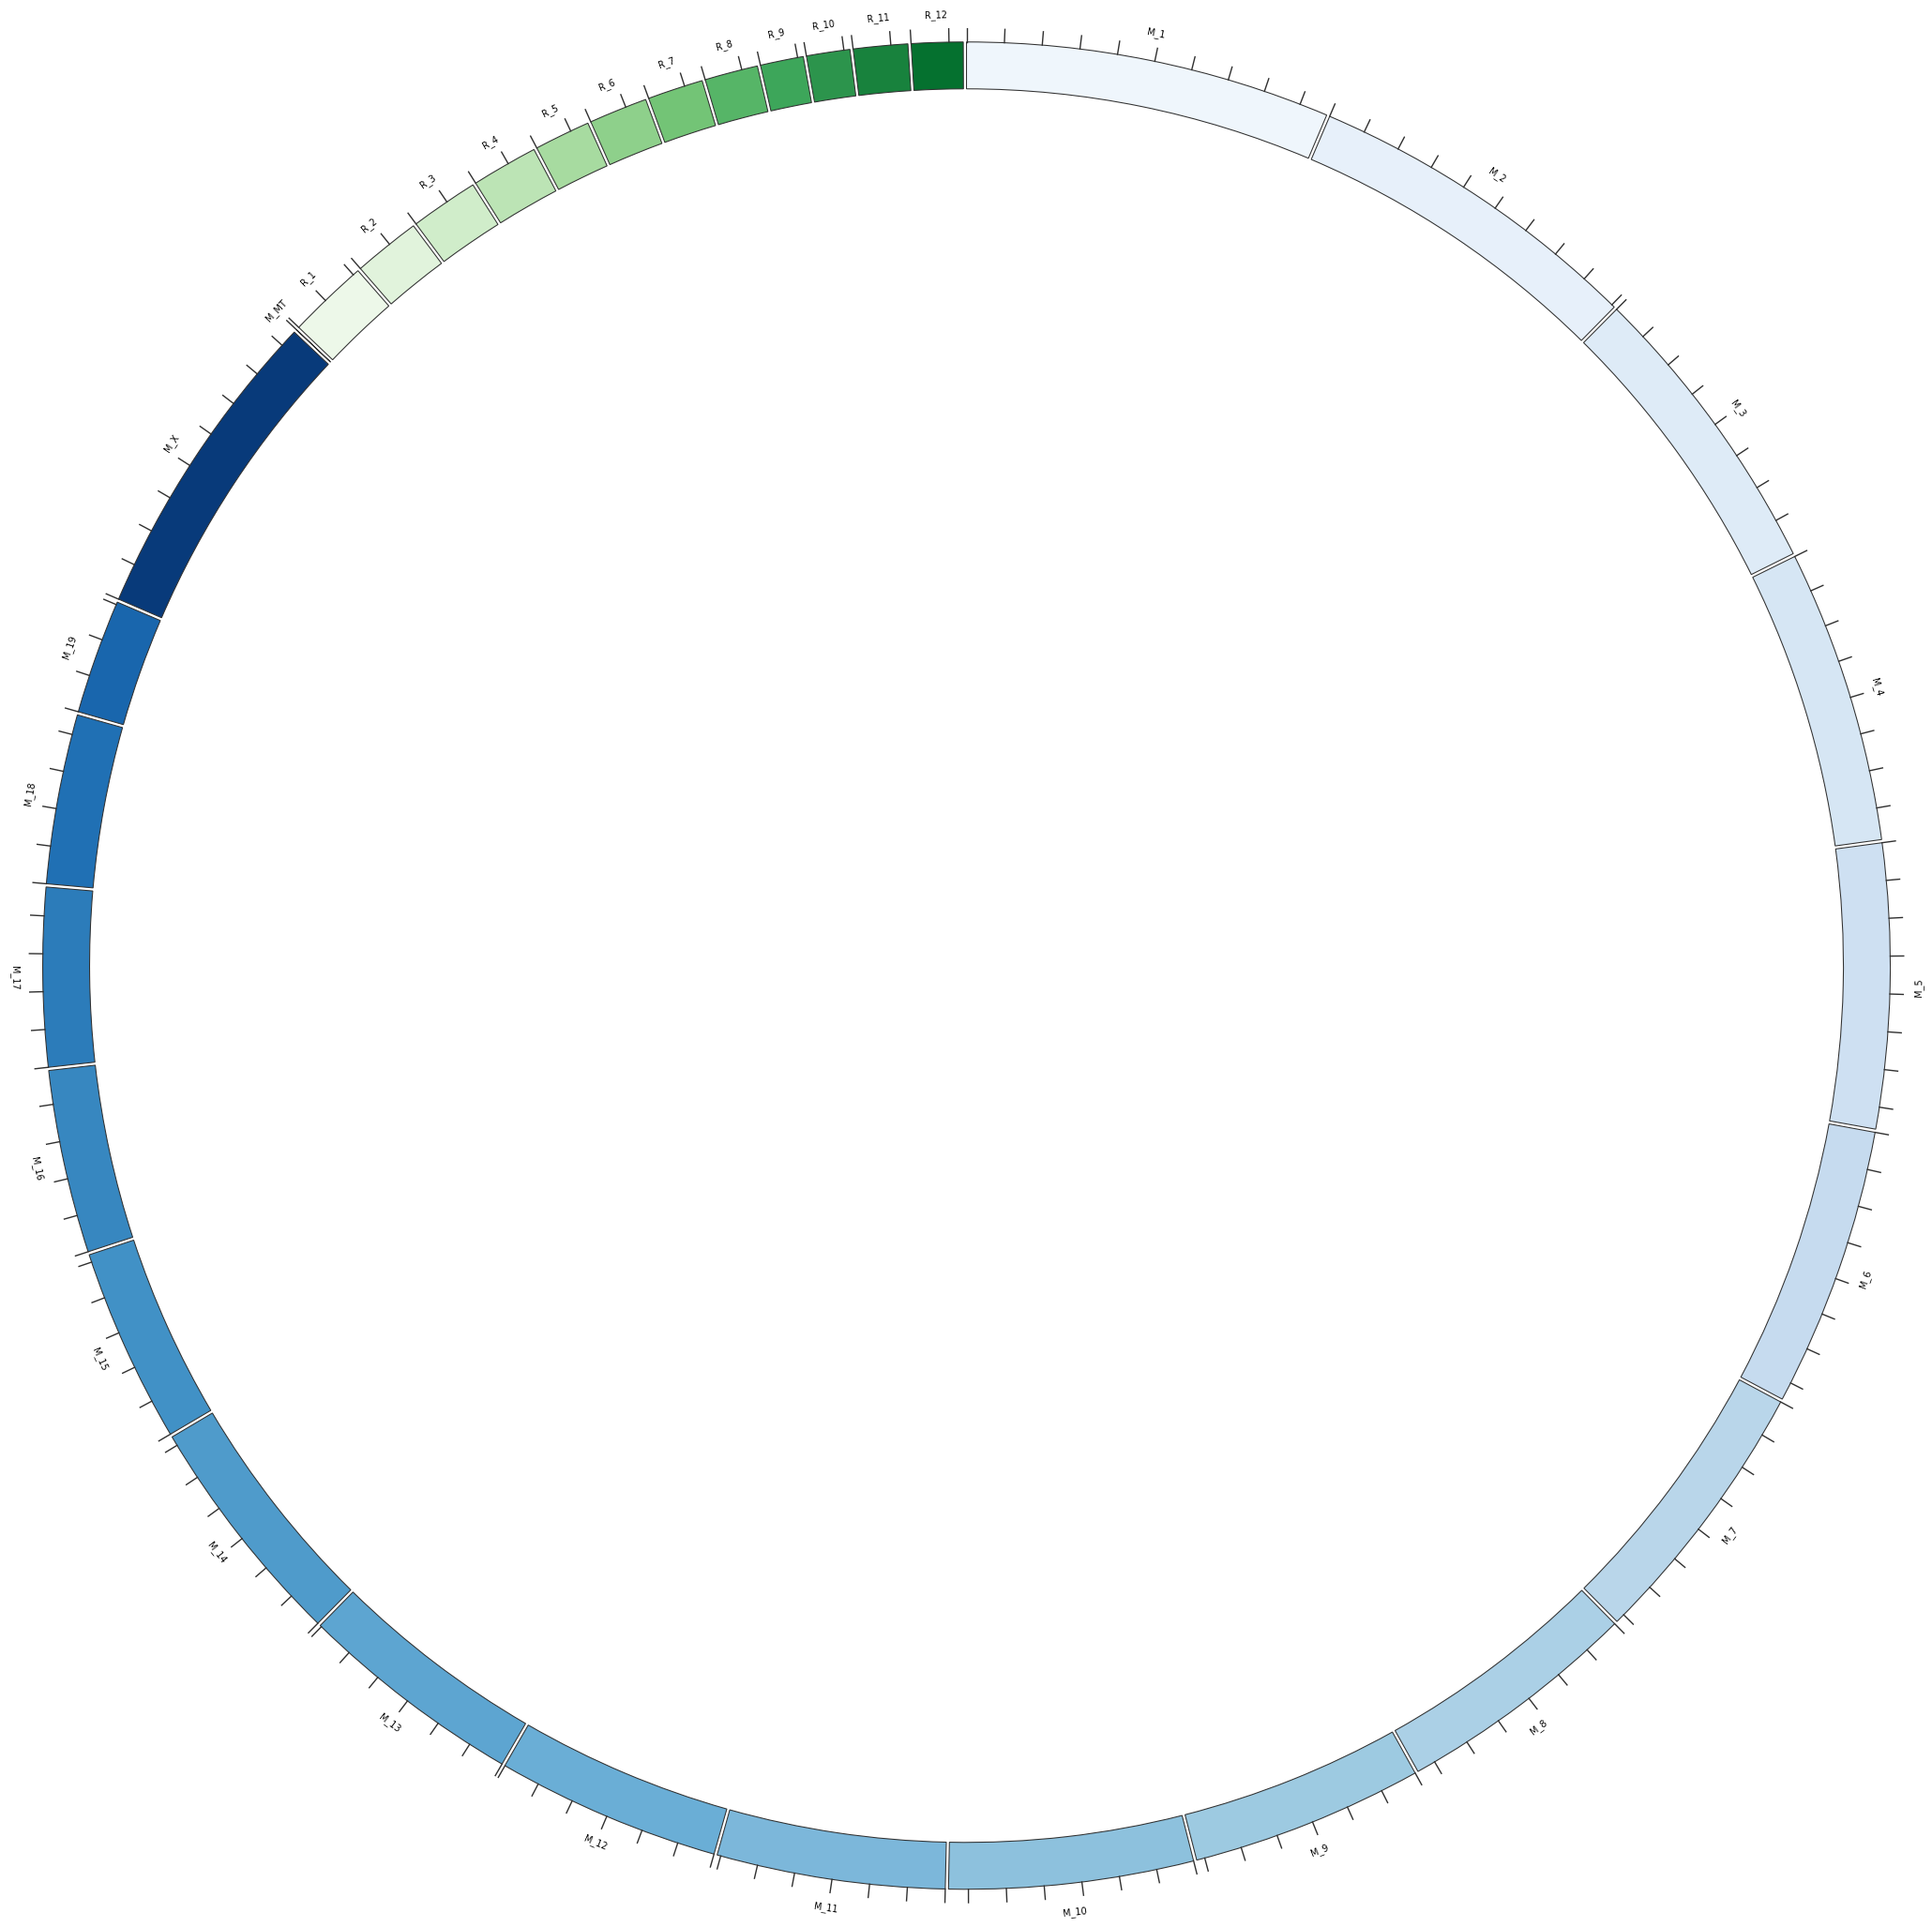

In [8]:
circle.figure

## Scatter plot of mouse vs rice upregulated genes

In [9]:
# Initialize
arcdata_dict = collections.defaultdict(dict)

for index, row in combined_df_score.iterrows():
    name = row['Chromosome/scaffold name']
    start = row['Gene start (bp)']
    end = row['Gene end (bp)']
    mid = (start + end) // 2
    value = row['HN-score(HN5)']

    if name not in arcdata_dict: # if the key is not in the dictionary, add it
        arcdata_dict[name]["positions"] = []
        arcdata_dict[name]["values"] = []

    arcdata_dict[name]["positions"].append(mid)
    arcdata_dict[name]["values"].append(value)


# plot
vmin, vmax = combined_df_score['HN-score(HN5)'].min(), combined_df_score['HN-score(HN5)'].max()
for key in arcdata_dict:
    circle.scatterplot(
        key,
        data=arcdata_dict[key]["values"],
        positions=arcdata_dict[key]["positions"], 
        rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)],
        raxis_range=(840, 940),
        facecolor="orangered",
        edgecolor="black",
        spine=True
    )

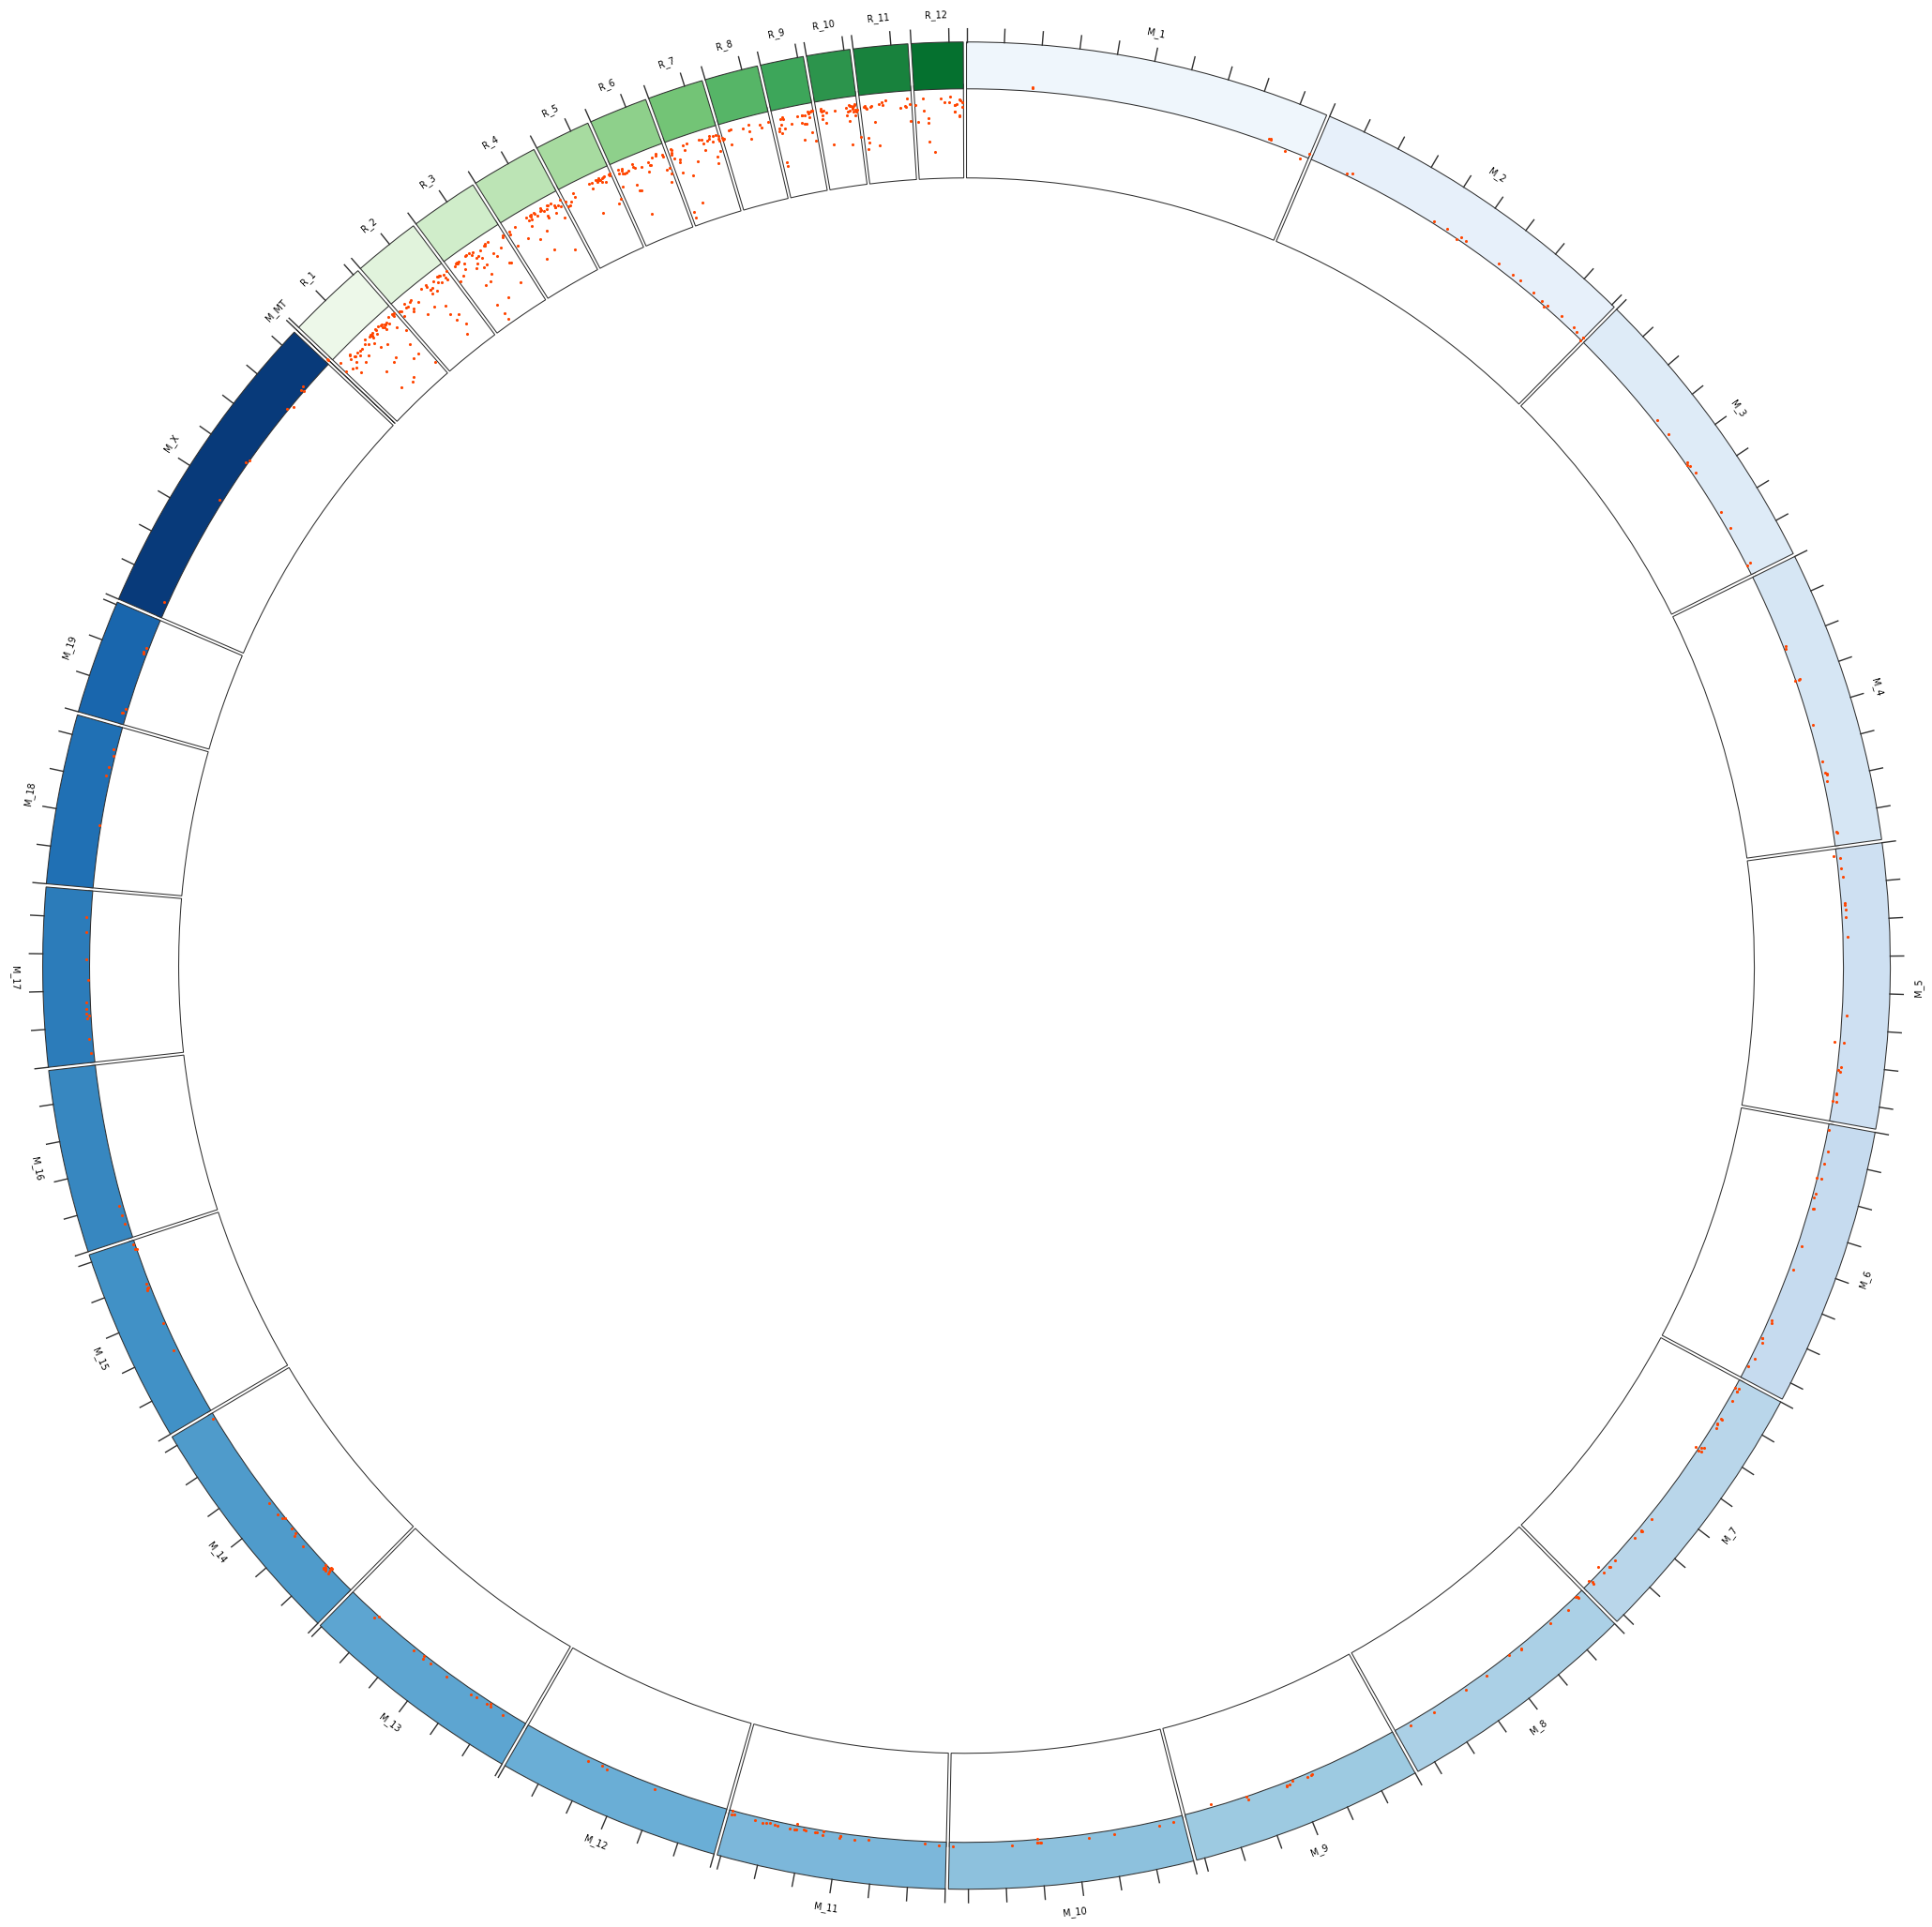

In [10]:
circle.figure

## linkplot of GOslim terms for human vs rice upregulated genes

In [11]:
merged_df_goslim_sorted = pd.read_csv(f"../data/circos_{direction}_MR_2312/combined_goslim_enrichment_{direction}.tsv", sep='\t')
display(merged_df_goslim_sorted)

GOSlim GOSlim GOA Accession(s)  \
0       GO:0005576: extracellular region              GO:0005576   
1       GO:0005576: extracellular region              GO:0005576   
2       GO:0005576: extracellular region              GO:0005576   
3       GO:0005576: extracellular region              GO:0005576   
4       GO:0005576: extracellular region              GO:0005576   
...                                  ...                     ...   
16810  GO:0005783: endoplasmic reticulum              GO:0005783   
16811  GO:0005783: endoplasmic reticulum              GO:0005783   
16812  GO:0005783: endoplasmic reticulum              GO:0005783   
16813  GO:0005783: endoplasmic reticulum              GO:0005783   
16814  GO:0005783: endoplasmic reticulum              GO:0005783   

      GOSlim GOA Description       GOSlim_domain Gene stable ID_rice  \
0       extracellular region  cellular_component        Os06g0688200   
1       extracellular region  cellular_component        Os01g0696800   
2       extracellular region  cellular_component        Os06g0306300   
3       extracellular region  cellular_component        Os06g0688200   
4       extracellular region  cellular_component        Os01g0613500   
...                      ...                 ...                 ...   
16810  endoplasmic reticulum  cellular_component        Os05g0482400   
16811  endoplasmic reticulum  cellular_component        Os05g0482400   
16812  endoplasmic reticulum  cellular_component        Os05g0482400   
16813  endoplasmic reticulum  cellular_component        Os05g0482400   
16814  endoplasmic reticulum  cellular_component        Os05g0482400   

      Gene stable ID_mouse Chromosome/scaffold name_rice  start1 (bp)  \
0       ENSMUSG00000109523                           R_6     28707334   
1       ENSMUSG00000074141                           R_1     28835243   
2       ENSMUSG00000030858                           R_6     11559570   
3       ENSMUSG00000030858                           R_6     28707334   
4       ENSMUSG00000030858                           R_1     24343518   
...                    ...                           ...          ...   
16810   ENSMUSG00000031444                           R_5     23728568   
16811   ENSMUSG00000022297                           R_5     23728568   
16812   ENSMUSG00000044916                           R_5     23728568   
16813   ENSMUSG00000047694                           R_5     23728568   
16814   ENSMUSG00000062526                           R_5     23728568   

       end1 (bp) Chromosome/scaffold name_mouse  start2 (bp)  end2 (bp)  \
0       28708349                            M_8     70782467   70784237   
1       28836884                            M_7     44465811   44490233   
2       11560896                            M_7    130927673  130931245   
3       28708349                            M_7    130927673  130931245   
4       24345172                            M_7    130927673  130931245   
...          ...                            ...          ...        ...   
16810   23738372                            M_8     13087308   13106676   
16811   23738372                           M_15     38869429   38901583   
16812   23738372                            M_2     92212883   92216053   
16813   23738372                            M_X     97979922   97992623   
16814   23738372                           M_18     67358114   67378901   

       HN-score(HN5)_rice  HN-score(HN5)_mouse  counts_down  fold_enrichment  \
0                     -77                  -17          841         4.426216   
1                     -42                  -30          841         4.426216   
2                     -41                  -33          841         4.426216   
3                     -77                  -33          841         4.426216   
4                     -75                  -33          841         4.426216   
...                   ...                  ...          ...              ...   
16810         

In [12]:
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)

min_enrichment = merged_df_goslim_sorted['fold_enrichment'].min()
max_enrichment = merged_df_goslim_sorted['fold_enrichment'].max()
min_counts = merged_df_goslim_sorted[f'counts_{direction}'].min()
max_counts = merged_df_goslim_sorted[f'counts_{direction}'].max()

n_colors_above = len(merged_df_goslim_sorted[merged_df_goslim_sorted['fold_enrichment'] > 1.5]['GOSlim'].unique())
n_colors_below = len(merged_df_goslim_sorted[merged_df_goslim_sorted['fold_enrichment'] <= 1.5]['GOSlim'].unique())

# Create color palette
red_palette = sns.color_palette("plasma", n_colors=n_colors_above)
blue_palette = sns.color_palette("crest", n_colors=n_colors_below)

def get_color (fold_enrichment, goslim_term, threshold=1.5):
    normalized = (fold_enrichment - min_enrichment) / (max_enrichment - min_enrichment)
    if fold_enrichment > threshold:
        index = merged_df_goslim_sorted[merged_df_goslim_sorted['fold_enrichment'] > 1.5]['GOSlim'].unique().tolist().index(goslim_term)
        return red_palette[index % n_colors_above]
    else:
        index = merged_df_goslim_sorted[merged_df_goslim_sorted['fold_enrichment'] <= 1.5]['GOSlim'].unique().tolist().index(goslim_term)
        return blue_palette[index % n_colors_below]

def get_linewidth(fold_enrichment, min_enrichment, max_enrichment, 
                  min_linewidth_below, max_linewidth_below, 
                  min_linewidth_above, max_linewidth_above, threshold=1.5):
    normalized = (fold_enrichment - min_enrichment) / (max_enrichment - min_enrichment)
    if fold_enrichment > threshold:
        return min_linewidth_above + (max_linewidth_above - min_linewidth_above) * normalized
    else:
        return min_linewidth_below + (max_linewidth_below - min_linewidth_below) * normalized
    
min_linewidth_below = 1 * 10**-4
max_linewidth_below = 1 * 10**-6
min_linewidth_above = 0.04
max_linewidth_above = 0.05


for index, row in merged_df_goslim_sorted.iterrows():
    ontology = row['GOSlim']
    fold_enrichment = row['fold_enrichment']
    counts_up = row[f'counts_{direction}']

    color = get_color(fold_enrichment, ontology)
    linewidth = get_linewidth(fold_enrichment, min_enrichment, max_enrichment, 
                              min_linewidth_below, max_linewidth_below, 
                              min_linewidth_above, max_linewidth_above)
    name1 = row['Chromosome/scaffold name_rice'] # rice
    start1 = int(row['start1 (bp)'])
    end1 = int(row['end1 (bp)'])
    name2 = row['Chromosome/scaffold name_mouse'] # mouse
    start2 = int(row['start2 (bp)'])
    end2 = int(row['end2 (bp)'])

    source = (name1, start1, end1, 840)
    destination = (name2, start2, end2, 840)
    circle.chord_plot(source, 
                        destination, 
                        facecolor=color,
                        linewidth=linewidth,
                        edgecolor=color
    )

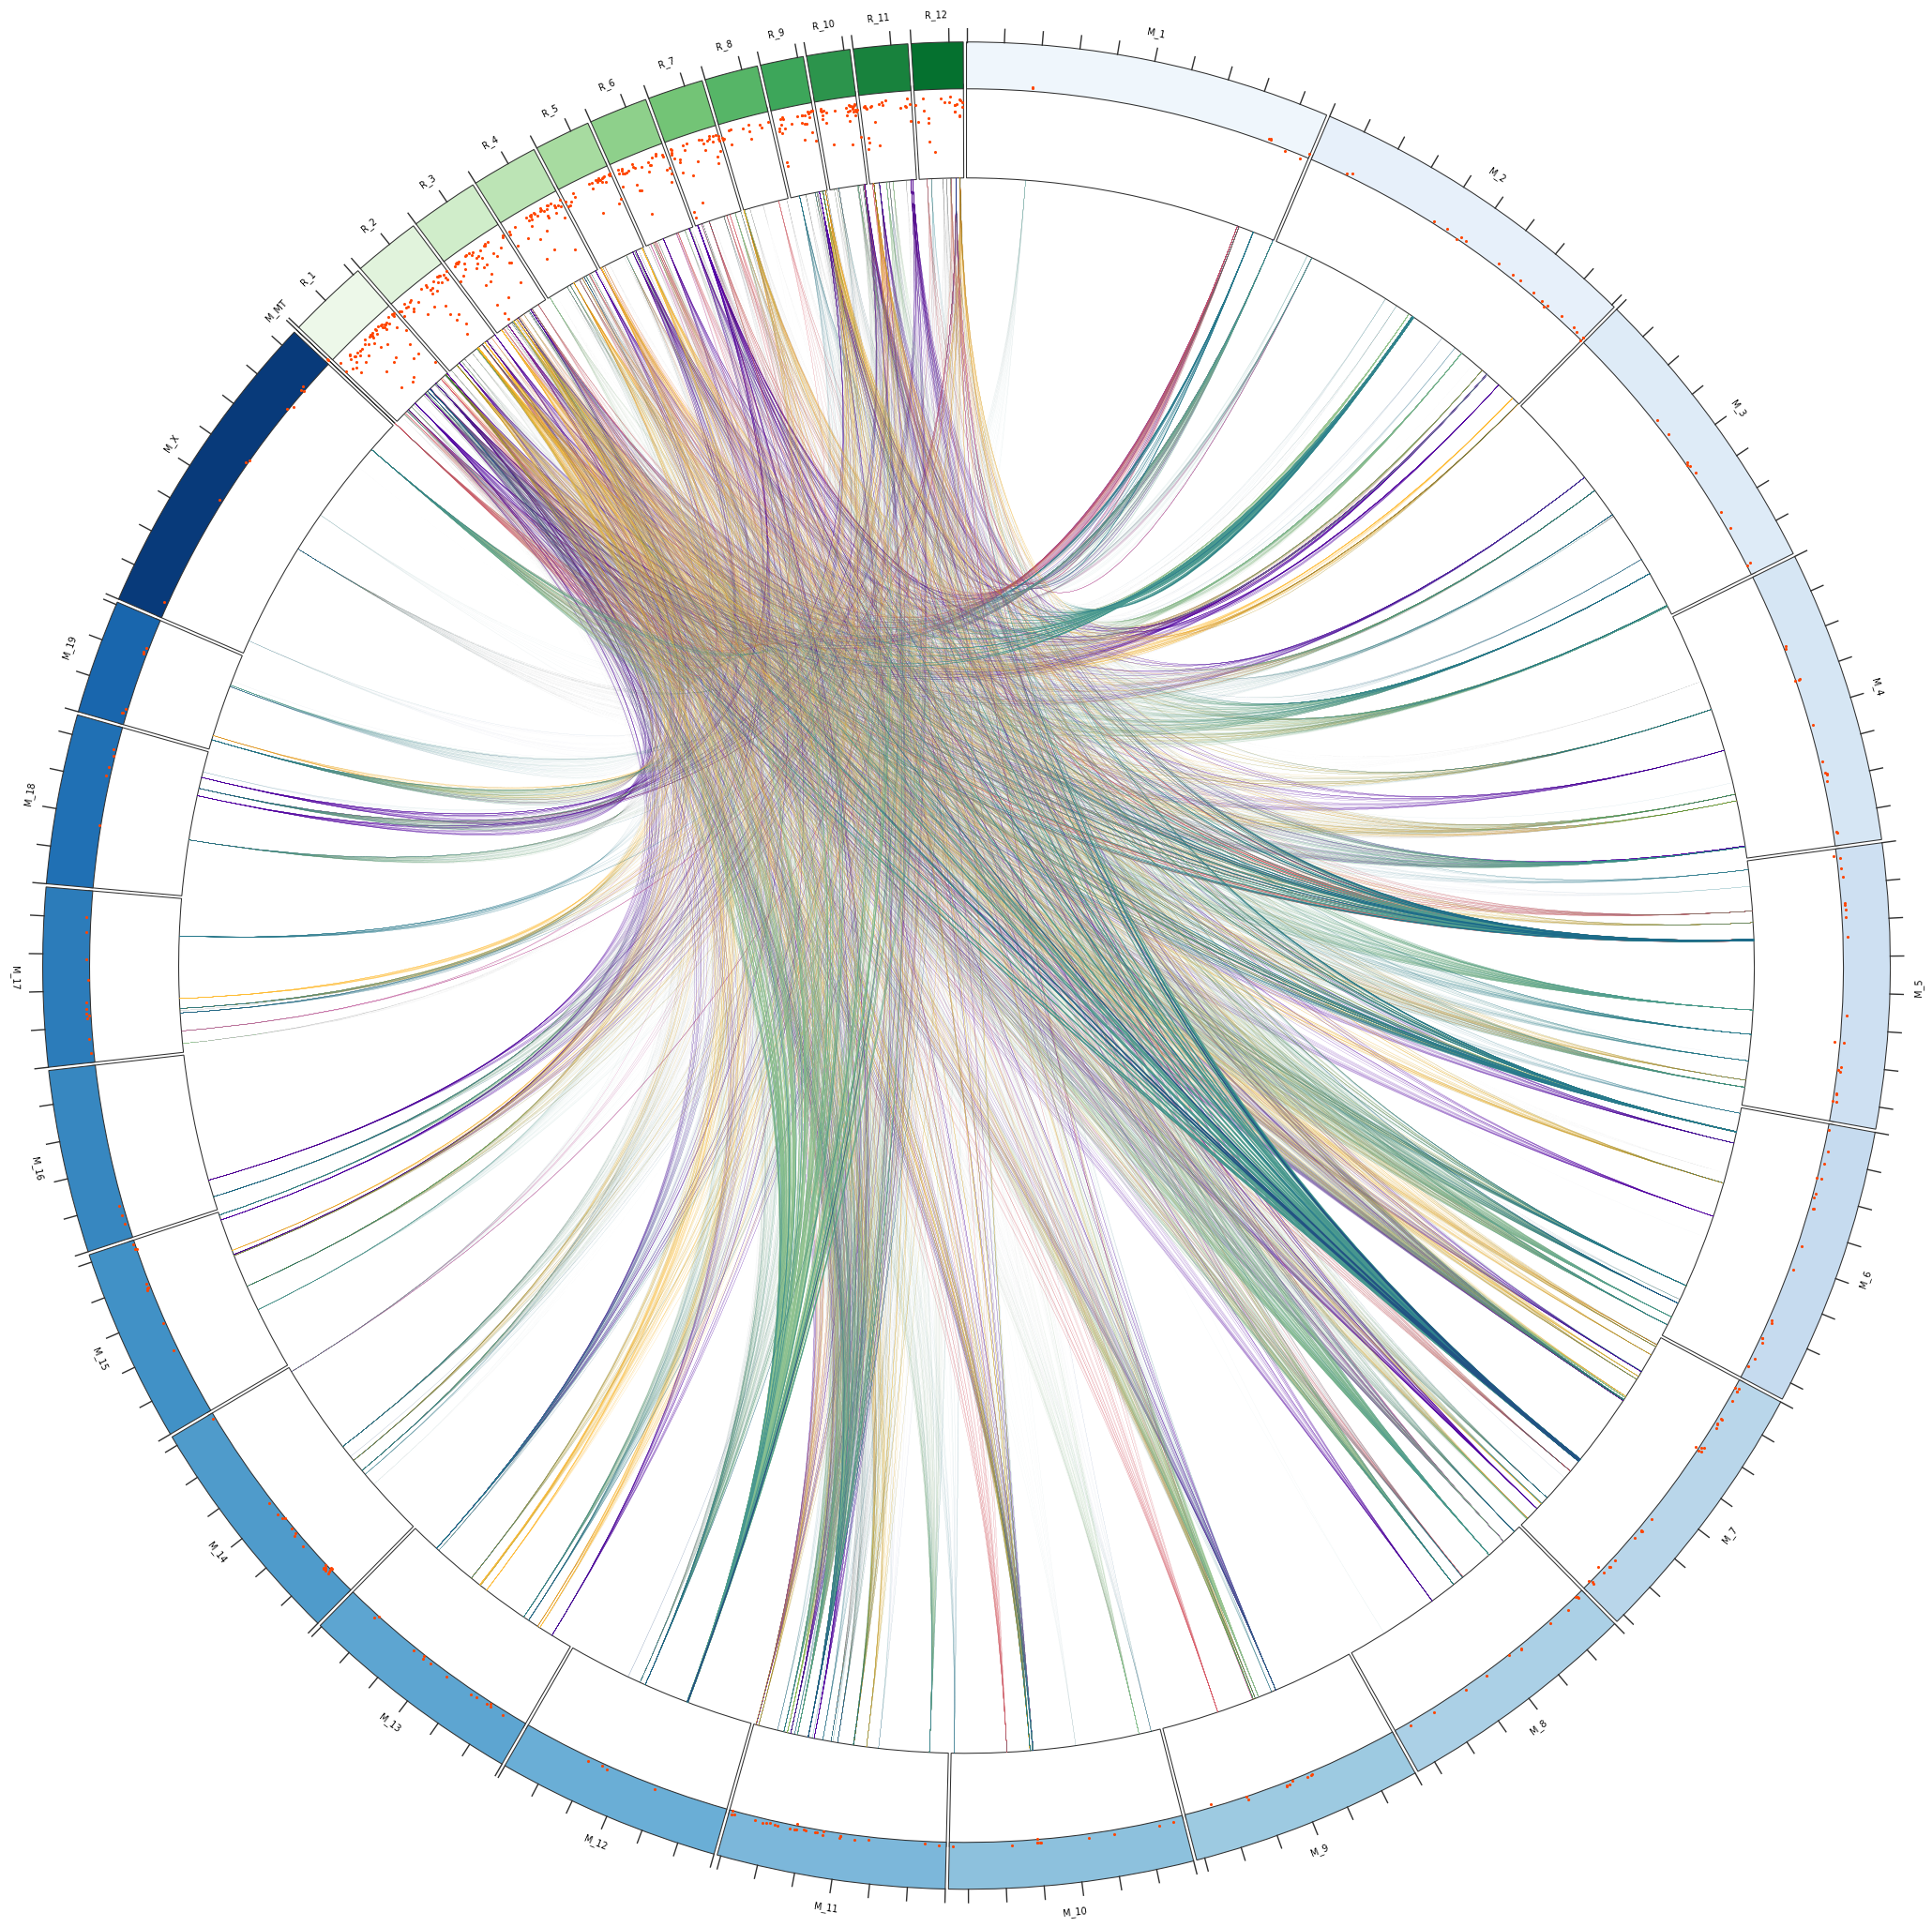

In [13]:
circle.figure

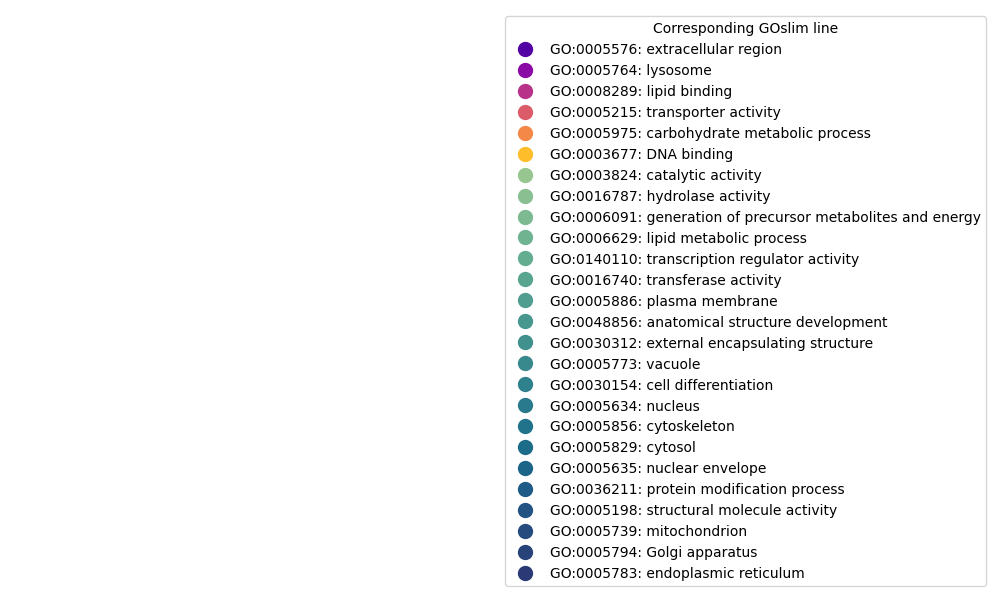

In [14]:
ontology_color_dict = {}
for ontology in merged_df_goslim_sorted['GOSlim'].unique():
    fold_enrichment = merged_df_goslim_sorted[merged_df_goslim_sorted['GOSlim'] == ontology]['fold_enrichment'].mean()
    ontology_color_dict[ontology] = get_color(fold_enrichment, ontology)

# 凡例の作成
fig, ax = plt.subplots(figsize=(6, 6))
for ontology, color in ontology_color_dict.items():
    ax.plot([], [], 
            label=ontology, 
            color=color, 
            marker='o', 
            markersize=10, 
            linestyle='None')

ax.legend(title="Corresponding GOslim line", 
          bbox_to_anchor=(1.05, 1), 
          loc='upper left')
ax.axis('off')
plt.show()
